# DSC680: Project 2: Child's Problematic Internet Use Among Children and Young Adults

### Data Analysis and Machine Learning Regression Algorithm to Predict  Severity Impairment Index (SII)

## By: Janine Par 


In [94]:
# Export Libraries required for this project 
import numpy as np  
import pandas as pd  
import numpy as np  

#import json
import datetime
import re
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 800)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import cohen_kappa_score,confusion_matrix,make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, accuracy_score
#from catboost import CatBoostClassifier

# Healthy Brain Network (HBR) Data Preparation and Exploration Data Analysis

### Load the data from Kaggle and Analyze the structure of the dataset

In [2]:
piu_df=pd.read_csv('train.csv',  encoding='latin-1')  
piu_dd = pd.read_csv('data_dictionary.csv')

### Determine the structure of the dataset: Record count and snapshot of data
* 3960 records 
* 82 columns

The data is a clinical sample of about ~3900 youth from 5-22 years old who performed both clinical and research screenings. 


In [3]:
piu_df.shape

(3960, 82)

In [4]:
piu_df.head(10)

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.00,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.00,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.50,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.00,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,001f3379,Spring,13,1,Winter,50.0,Summer,22.279952,59.50,112.2,NaN,60.0,73.0,102.0,NaN,NaN,NaN,NaN,Summer,12.0,0.0,16.5,2.0,17.9,2.0,6.0,0.0,10.0,1.0,11.0,1.0,8.0,0.0,Summer,2.0,4.33036,30.1865,1330.970,1996.45,30.21240,84.0285,16.6877,13.49880,67.97150,2.0,32.9141,20.90200,79.6982,35.3804,63.1265,NaN,NaN,Spring,4.110,Summer,3.0,3.0,3.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,0.0,1.0,3.0,3.0,2.0,1.0,3.0,1.0,2.0,1.0,34.0,Summer,40.0,56.0,Spring,0.0,1.0
6,0038ba98,Fall,10,0,NaN,NaN,Fall,19.660760,55.00,84.6,NaN,123.0,83.0,163.0,NaN,NaN,NaN,NaN,Fall,9.0,1.0,NaN,NaN,NaN,NaN,2.0,0.0,11.0,1.0,11.0,1.0,11.0,1.0,Fall,2.0,3.78271,19.6629,1135.860,1817.38,16.32750,63.2470,14.7000,4.96291,21.35300,2.0,30.8936,16.02590,59.4643,26.1957,47.2211,N

### Determine the column  and datatypes;

In [5]:
piu_df.columns.tolist() 

['id',
 'Basic_Demos-Enroll_Season',
 'Basic_Demos-Age',
 'Basic_Demos-Sex',
 'CGAS-Season',
 'CGAS-CGAS_Score',
 'Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-Season',
 'FGC-FGC_CU',
 'FGC-FGC_CU_Zone',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL',
 'FGC-FGC_TL_Zone',
 'BIA-Season',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'PAQ_A-Season',

In [6]:
piu_df.dtypes

id                                         object
Basic_Demos-Enroll_Season                  object
Basic_Demos-Age                             int64
Basic_Demos-Sex                             int64
CGAS-Season                                object
CGAS-CGAS_Score                           float64
Physical-Season                            object
Physical-BMI                              float64
Physical-Height                           float64
Physical-Weight                           float64
Physical-Waist_Circumference              float64
Physical-Diastolic_BP                     float64
Physical-HeartRate                        float64
Physical-Systolic_BP                      float64
Fitness_Endurance-Season                   object
Fitness_Endurance-Max_Stage               float64
Fitness_Endurance-Time_Mins               float64
Fitness_Endurance-Time_Sec                float64
FGC-Season                                 object
FGC-FGC_CU                                float64


### Identify the categorical variables 

In [7]:
piu_df_cat = piu_df.select_dtypes(exclude=np.number)
piu_df_cat.head ()
piu_df_cat.columns.tolist()

['id',
 'Basic_Demos-Enroll_Season',
 'CGAS-Season',
 'Physical-Season',
 'Fitness_Endurance-Season',
 'FGC-Season',
 'BIA-Season',
 'PAQ_A-Season',
 'PAQ_C-Season',
 'PCIAT-Season',
 'SDS-Season',
 'PreInt_EduHx-Season']

### Identify the numeric variables

In [8]:
piu_df_num = piu_df.select_dtypes(include=np.number)
piu_df_num.head ()
piu_df_num.columns.tolist()

['Basic_Demos-Age',
 'Basic_Demos-Sex',
 'CGAS-CGAS_Score',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec',
 'FGC-FGC_CU',
 'FGC-FGC_CU_Zone',
 'FGC-FGC_GSND',
 'FGC-FGC_GSND_Zone',
 'FGC-FGC_GSD',
 'FGC-FGC_GSD_Zone',
 'FGC-FGC_PU',
 'FGC-FGC_PU_Zone',
 'FGC-FGC_SRL',
 'FGC-FGC_SRL_Zone',
 'FGC-FGC_SRR',
 'FGC-FGC_SRR_Zone',
 'FGC-FGC_TL',
 'FGC-FGC_TL_Zone',
 'BIA-BIA_Activity_Level_num',
 'BIA-BIA_BMC',
 'BIA-BIA_BMI',
 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW',
 'PAQ_A-PAQ_A_Total',
 'PAQ_C-PAQ_C_Total',
 'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-P

### Determine Missing columns or Duplicated rows

In [9]:
#This function will determining missing rows
def df_missing_cols (df, name):
    for c in df.columns:
            is_missing=df[c].isna().sum()
            if is_missing > 0:
                print ("dataframe {} column {} has {} missing values (s)". format (name,c,is_missing))


In [10]:
df_missing_cols(piu_df,'piu_df')

dataframe piu_df column CGAS-Season has 1405 missing values (s)
dataframe piu_df column CGAS-CGAS_Score has 1539 missing values (s)
dataframe piu_df column Physical-Season has 650 missing values (s)
dataframe piu_df column Physical-BMI has 938 missing values (s)
dataframe piu_df column Physical-Height has 933 missing values (s)
dataframe piu_df column Physical-Weight has 884 missing values (s)
dataframe piu_df column Physical-Waist_Circumference has 3062 missing values (s)
dataframe piu_df column Physical-Diastolic_BP has 1006 missing values (s)
dataframe piu_df column Physical-HeartRate has 993 missing values (s)
dataframe piu_df column Physical-Systolic_BP has 1006 missing values (s)
dataframe piu_df column Fitness_Endurance-Season has 2652 missing values (s)
dataframe piu_df column Fitness_Endurance-Max_Stage has 3217 missing values (s)
dataframe piu_df column Fitness_Endurance-Time_Mins has 3220 missing values (s)
dataframe piu_df column Fitness_Endurance-Time_Sec has 3220 missing 

In [11]:
piu_df.isna().sum().sort_values(ascending = False)

PAQ_A-PAQ_A_Total                         3485
PAQ_A-Season                              3485
Fitness_Endurance-Time_Sec                3220
Fitness_Endurance-Time_Mins               3220
Fitness_Endurance-Max_Stage               3217
Physical-Waist_Circumference              3062
FGC-FGC_GSND_Zone                         2898
FGC-FGC_GSD_Zone                          2897
FGC-FGC_GSD                               2886
FGC-FGC_GSND                              2886
Fitness_Endurance-Season                  2652
PAQ_C-Season                              2239
PAQ_C-PAQ_C_Total                         2239
BIA-BIA_DEE                               1969
BIA-BIA_FFM                               1969
BIA-BIA_BMR                               1969
BIA-BIA_BMI                               1969
BIA-BIA_ECW                               1969
BIA-BIA_FFMI                              1969
BIA-BIA_FMI                               1969
BIA-BIA_Activity_Level_num                1969
BIA-BIA_Fat  

### Identify Columns that 50% of rows are empty/nulls

In [12]:
piu_df.loc[:, piu_df.isnull().sum() > 0.5*piu_df.shape[0]].columns

Index(['Physical-Waist_Circumference', 'Fitness_Endurance-Season',
       'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins',
       'Fitness_Endurance-Time_Sec', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone',
       'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'PAQ_A-Season', 'PAQ_A-PAQ_A_Total',
       'PAQ_C-Season', 'PAQ_C-PAQ_C_Total'],
      dtype='object')

#### Removal columns that have > 50% are missing values

In [13]:
#Columns that has more than 50% of records are missing are dropped.
piu_df=piu_df.loc[:, piu_df.isnull().sum() < 0.5*piu_df.shape[0]]
piu_df.shape    
    

(3960, 69)

13 Columns that has more than 50% of records are missing are dropped.

### Check for Duplicates

In [14]:
piu_df.duplicated().sum()

0

No Duplicate Records has been identified

### Review the remaining columns

In [15]:
piu_df.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Diastolic_BP',
       'Physical-HeartRate', 'Physical-Systolic_BP', 'FGC-Season',
       'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone',
       'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone',
       'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM',
       'BIA-BIA_TBW', 'PCIAT-Season', 'PCIAT-PCIAT_01', 'PCIAT-PCIAT_02',
       'PCIAT-PCIAT_03', 'PCIAT-PCIAT_04', 'PCIAT-PCIAT_05', 'PCIAT-PCIAT_06',
       'PCIAT-PCIAT_07', 'PCIAT-PCIAT_08', 'PCIAT-PCIAT_09', 'PCIAT-PCIAT_1

##  Feature Engineering  and Handling Missing values


In [16]:
#Create a copy of the original dataset
piu_df_cleaned=piu_df.copy()

In [17]:
piu_df_cleaned.shape

(3960, 69)

#### Create Age Range

In [18]:
piu_df_cleaned['age_range'] = pd.cut(piu_df_cleaned['Basic_Demos-Age'], bins=[4, 12, 18, 22], labels=['Children (5-12)', 'Adolescents (13-18)', 'Young Adults (19-22)'])

In [19]:
piu_df_cleaned.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,age_range
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,Fall,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0,Children (5-12)
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,75.0,70.0,122.0,Fall,3.0,0.0,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0,Children (5-12)
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,65.0,94.0,117.0,Fall,20.0,1.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0,Children (5-12)
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,60.0,97.0,117.0,Summer,18.0,1.0,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0,Children (5-12)
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adolescents (13-18)


### Handling of Missing Columns

Create grouping columns. This will be used later to gather median values bsed on these column grouping


In [20]:
group_cols = ['age_range', 'Basic_Demos-Sex']

#### Gather the categorical columns and apply Mode 

In [21]:
categorical_columns = ['Basic_Demos-Enroll_Season', 'CGAS-Season', 'Physical-Season', 'FGC-Season', 'BIA-Season', 'SDS-Season', 'PreInt_EduHx-Season']

# Handle categorical columns 
for column in categorical_columns:
    mode_value = piu_df_cleaned[column].mode()[0]
    piu_df_cleaned[column].fillna(mode_value, inplace=True)
    

#### Impute Children's Global Assessment Scale missing data using median 

In [22]:
piu_df_cleaned['CGAS-CGAS_Score'] = piu_df_cleaned['CGAS-CGAS_Score'].fillna(piu_df_cleaned['CGAS-CGAS_Score'].median())

#### Handle missing values for Weight and Height using median group by Age Group and Sex

In [23]:
for col in ['Physical-Weight', 'Physical-Height']:
    # Median based on Age Group and Sex
    piu_df_cleaned[col] = piu_df_cleaned.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))

#### Handling missing values for BMI  by calculating using #weight in kilograms (kg) divided by the square of height in meters (m2)


Weight is LBS so multiple .454 to convert LBS to KG
Height is Inches so multiple .025 to convert to Meters 

In [24]:
#Height (in)
#Weight (lbs)
   # converting the height into m and weight into in as used in BMI
piu_df_cleaned['Physical-Weight'] = piu_df_cleaned['Physical-Weight'] * 0.454 # Conversion from lbs to KG
piu_df_cleaned['Physical-Height'] = piu_df_cleaned['Physical-Height'] * 0.025  #Conversion from Inches to Meters 

piu_df_cleaned.loc[piu_df_cleaned['Physical-BMI'].isna(), 'Physical-BMI'] = piu_df_cleaned.apply(
    lambda row: row['Physical-Weight'] / (row['Physical-Height'] ** 2), axis=1
)

#### Handling missing values for Physical Measure Fields Using the median by grouping Age and Sex

In [25]:
phys_cols = ['Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']
for col in phys_cols:
    # Median based on Age Group and Sex
    piu_df_cleaned[col] = piu_df_cleaned.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))

#### Handling missing values for FitnessGram using the median by grouping Age and Sex


In [26]:
fitness_cols = ['FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']
for col in fitness_cols:
    piu_df_cleaned[col] = piu_df_cleaned.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))
    piu_df_cleaned[col] = piu_df_cleaned[col].fillna(piu_df_cleaned[col].median())

#### Handling missing values for Bio-electric Impedance Analysis  Using the median by grouping Age and Sex


In [27]:
bia_cols =['BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR',
 'BIA-BIA_DEE',
 'BIA-BIA_ECW',
 'BIA-BIA_FFM',
 'BIA-BIA_FFMI',
 'BIA-BIA_FMI',
 'BIA-BIA_Fat',
 'BIA-BIA_Frame_num',
 'BIA-BIA_ICW',
 'BIA-BIA_LDM',
 'BIA-BIA_LST',
 'BIA-BIA_SMM',
 'BIA-BIA_TBW']

In [28]:
for col in bia_cols:
    piu_df_cleaned[col] = piu_df_cleaned.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))
    piu_df_cleaned[col] = piu_df_cleaned[col].fillna(piu_df_cleaned[col].median())

#### Handling missing values for Sleep Disturbance Scale Using the median by grouping Age and Sex


In [29]:
# imputing Sleep Disturbance Scale
sds_cols = [i for i in piu_df_cleaned.columns if 'SDS' in i  and i !='SDS-Season']
sds_cols

['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

In [30]:
for col in sds_cols:
    piu_df_cleaned[col] = piu_df_cleaned.groupby(group_cols)[col].transform(lambda x: x.fillna(x.median()))
    piu_df_cleaned[col] = piu_df_cleaned[col].fillna(piu_df_cleaned[col].median())

#### Handling missing values for Internet Use using median  

In [31]:
piu_df_cleaned['PreInt_EduHx-computerinternet_hoursday'] = piu_df_cleaned.groupby(group_cols)['PreInt_EduHx-computerinternet_hoursday'].transform(lambda x: x.fillna(x.median()))
    

##### Check remaining fields with missing values

In [32]:
df_missing_cols(piu_df_cleaned,'piu_df')

dataframe piu_df column PCIAT-Season has 1224 missing values (s)
dataframe piu_df column PCIAT-PCIAT_01 has 1227 missing values (s)
dataframe piu_df column PCIAT-PCIAT_02 has 1226 missing values (s)
dataframe piu_df column PCIAT-PCIAT_03 has 1229 missing values (s)
dataframe piu_df column PCIAT-PCIAT_04 has 1229 missing values (s)
dataframe piu_df column PCIAT-PCIAT_05 has 1231 missing values (s)
dataframe piu_df column PCIAT-PCIAT_06 has 1228 missing values (s)
dataframe piu_df column PCIAT-PCIAT_07 has 1231 missing values (s)
dataframe piu_df column PCIAT-PCIAT_08 has 1230 missing values (s)
dataframe piu_df column PCIAT-PCIAT_09 has 1230 missing values (s)
dataframe piu_df column PCIAT-PCIAT_10 has 1227 missing values (s)
dataframe piu_df column PCIAT-PCIAT_11 has 1226 missing values (s)
dataframe piu_df column PCIAT-PCIAT_12 has 1229 missing values (s)
dataframe piu_df column PCIAT-PCIAT_13 has 1231 missing values (s)
dataframe piu_df column PCIAT-PCIAT_14 has 1228 missing values (

### Handling of PCIAT Fields with missing values

PCIAT: Parent-Child Internet Addiction Test has 20 items (PCIAT-PCIAT_01 to PCIAT-PCIAT_20) which are used to access child's behavior related to internet use and answers are from 0 to 5). The total score is used to identify the severity of the internet addiction. Let see the definition of each Question 


Check the data dictionary of the PCIAT Fields that  are used to derived our target variable

In [33]:
piu_dd[piu_dd.Field.str.contains('PCIAT-PCIAT')]

,Instrument,Field,Description,Type,Values,Value Labels
55,Parent-Child Internet Addiction Test,PCIAT-PCIAT_01,How often does your child disobey time limits you set for online use?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
56,Parent-Child Internet Addiction Test,PCIAT-PCIAT_02,How often does your child neglect household chores to spend more time online?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
57,Parent-Child Internet Addiction Test,PCIAT-PCIAT_03,How often does your child prefer to spend time online rather than with the rest of your family?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
58,Parent-Child Internet Addiction Test,PCIAT-PCIAT_04,How often does your child form new relationships with fellow online users?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
59,Parent-Child Internet Addiction Test,PCIAT-PCIAT_05,How often do you complain about the amount of time your child spends online?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
60,Parent-Child Internet Addiction Test,PCIAT-PCIAT_06,How often do your child's grades suffer because of the amount of time he or she spends online?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
61,Parent-Child Internet Addiction Test,PCIAT-PCIAT_07,How often does your child check his or her e-mail before doing something else?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
62,Parent-Child Internet Addiction Test,PCIAT-PCIAT_08,How often does your child seem withdrawn from others since discovering the Internet?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
63,Parent-Child Internet Addiction Test,PCIAT-PCIAT_09,How often does your child become defensive or secretive when asked what he or she does online?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"
64,Parent-Child Internet Addiction Test,PCIAT-PCIAT_10,How often have you caught your child sneaking online against your wishes?,categorical int,"0,1,2,3,4,5","0=Does Not Apply, 1=Rarely, 2=Occasionally, 3=Frequently, 4=Often, 5=Always"


Validate the Total Score Range that is used to determine for each SII

In [34]:
pciat_score_ranges = piu_df.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max'])
pciat_score_ranges = pciat_score_ranges.rename(columns={
    'min': 'Minimum PCIAT Total Score',
    'max': 'Maximum PCIAT Total Score'
})
pciat_score_ranges

,Minimum PCIAT Total Score,Maximum PCIAT Total Score
sii,,
0.0,0.0,30.0
1.0,31.0,49.0
2.0,50.0,79.0
3.0,80.0,93.0


In [35]:
piu_dd[piu_dd['Field'] == 'PCIAT-PCIAT_Total']['Value Labels'].iloc[0]

'Severity Impairment Index: 0-30=None; 31-49=Mild; 50-79=Moderate; 80-100=Severe'

#### Handling missing PCIAT responses: If certain PCIAT questions were left unanswered, the SII may be misleading. This is because the SII is still calculated using the TOTAL PCIAT Score, and unanswered questions can lower the overall SII value.









### Get the columns of PCIAT variables

In [36]:
pciat_columns = [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 21)]
pciat_columns


['PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20']

For each records, assign the missing value on PCIAT Scores with Minimum answer (0=Does Not Apply) then get the total PCIAT value and create a column. This new column is the PCIAT Score Total with Missing values imputed with 0

In [37]:
# Get MIN value of PCA Answer 0=Does Not Apply
piu_df_cleaned['Pciat_total_min']=piu_df_cleaned[pciat_columns].fillna(0).sum(axis=1)

For each records, assign the missing value on PCIAT Scores with Max answer (5=Always) then get the total PCIAT value and create a column. This new column is the PCIAT Score Total with Missing values imputed with 5

In [38]:
# Get Max Valud of PCA 5=Always
piu_df_cleaned['Pciat_total_max']=piu_df_cleaned[pciat_columns].fillna(5).sum(axis=1)


Get the Average value and recalculate the SII range using the Average value

In [39]:
piu_df_cleaned['Pciat_total_avg']=(piu_df_cleaned['Pciat_total_max']+piu_df_cleaned['Pciat_total_min'])/2

In [40]:
def recal_SII(total):
    if total<=30:
        return 0  # None
    elif 31 <= total <= 49:
        return 1  # Mild
    elif 50 <= total <= 79:
        return 2  # Moderate
    else:
        return 3  # Severe

In [41]:
piu_df_cleaned['sii_new']=piu_df_cleaned['Pciat_total_avg'].apply(recal_SII)

Review rows that have different SII NEW Value after we imputted the missing PCIAT Answers

In [42]:
Recalc_Rows = piu_df_cleaned[
    (piu_df_cleaned['sii_new'] != piu_df_cleaned['sii']) & piu_df_cleaned['sii'].notna()
]
Recalc_Rows.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii,age_range,Pciat_total_min,Pciat_total_max,Pciat_total_avg,sii_new
24,011e71c3,Summer,15,0,Fall,70.0,Summer,21.177784,1.5500,52.5732,61.0,58.0,144.0,Summer,0.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,4.0,0.0,Fall,4.0,8.72618,21.1801,1289.74,2708.46,20.5717,79.6375,14.5659,6.61421,36.1625,2.0,35.9062,23.1596,70.9113,35.1487,56.4779,Summer,2.0,2.0,3.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,NaN,2.0,30.0,Summer,34.0,49.0,Summer,1.0,0.0,Adolescents (13-18),30.0,35.0,32.5,1
93,053d7d31,Spring,15,1,Spring,65.0,Fall,22.482416,1.5875,56.6592,70.0,77.0,119.0,Fall,15.0,0.0,3.0,0.0,10.5,1.0,11.0,1.0,11.0,1.0,Summer,3.0,4.75440,22.2490,1339.39,2084.89,28.7848,84.9253,14.9878,7.10449,39.9492,2.0,34.0252,22.7601,80.7241,40.2319,62.7972,Fall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Spring,41.0,58.0,Spring,2.0,0.0,Adolescents (13-18),0.0,100.0,50.0,2
270,0fbb3ca5,Winter,15,0,Spring,55.0,Spring,19.024041,1.7500,60.2004,76.0,80.0,112.0,Spring,15.0,0.0,4.0,0.0,11.0,1.0,12.0,1.0,7.0,0.0,Summer,3.0,6.60843,21.8958,1580.06,2686.10,32.3693,110.5600,15.8638,6.03206,42.0397,2.0,47.9234,30.2676,103.9520,53.2668,80.2927,Spring,3.0,3.0,4.0,2.0,4.0,2.0,1.0,3.0,2.0,2.0,4.0,0.0,2.0,1.0,4.0,NaN,2.0,3.0,4.0,2.0,48.0,Spring,34.0,49.0,Winter,3.0,1.0,Adolescents (13-18),48.0,53.0,50.5,2
724,2bad0db7,Summer,11,0,Fall,68.0,Summer,18.545256,1.3750,36.2292,62.0,68.0,106.0,Summer,23.0,1.0,20.0,1.0,11.5,1.0,11.0,1.0,11.0,1.0,Summer,1.0,4.48680,18.5473,1131.52,1470.97,16.0914,62.7847,14.5925,3.95474,17.0153,2.0,31.3427,15.3506,58.2979,28.1708,47.4341,Summer,3.0,2.0,4.0,2.0,2.0,1.0,0.0,NaN,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,0.0,1.0,29.0,Summer,45.0,63.0,Summer,2.0,0.0,Children (5-12),29.0,34.0,31.5,1
877,34c30fad,Winter,19,1,Spring,65.0,Spring,28.321086,1.6125,76.0904,69.0,93.0,122.0,Spring,25.0,0.5,16.5,1.0,8.0,1.0,8.5,1.0,10.5,1.0,Spring,2.0,5.34945,28.3242,1473.39,2210.09,35.0914,99.1988,16.7645,11.55970,68.4012,2.0,38.5458,25.5616,93.8494,48.7932,73.6372,Spring,5.0,5.0,5.0,4.0,5.0,0.0,5.0,5.0,5.0,5.0,4.0,NaN,4.0,5.0,5.0,1.0,5.0,0.0,5.0,5.0,78.0,Spring,46.0,64.0,Winter,3.0,2.0,Young Adults (19-22),78.0,83.0,80.5,3


#### Create a New Dataset from clean DF and then Drop Unecessary fields 

ID columns is a unique identifier for each records and will not be used in the Machine Learning Algorithm. This column is dropped

In [43]:
piu_df = piu_df_cleaned.drop('id', axis=1)

Drop the original SII and use the new recalculated SII 

In [44]:
piu_df = piu_df.drop(['sii'],axis=1)
piu_df.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,Pciat_total_min,Pciat_total_max,Pciat_total_avg,sii_new
0,Fall,5,0,Winter,51.0,Fall,16.877316,1.1500,23.0632,67.0,82.0,112.0,Fall,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.668550,16.8792,932.498,1492.00,8.25598,41.5862,13.81770,3.061430,9.21377,1.0,24.43490,8.89536,38.91770,19.54130,32.69090,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,Spring,39.0,55.0,Fall,3.0,Children (5-12),55.0,55.0,55.0,2
1,Summer,9,0,Spring,65.0,Fall,14.035590,1.2000,20.8840,75.0,70.0,122.0,Fall,3.0,0.0,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.579490,14.0371,936.656,1498.65,6.01993,42.0291,12.82540,1.211720,3.97085,1.0,21.03520,14.97400,39.44970,15.41070,27.05520,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,Children (5-12),0.0,0.0,0.0,0
2,Summer,10,1,Fall,71.0,Fall,16.648696,1.4125,34.3224,65.0,94.0,117.0,Fall,20.0,1.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,Summer,2.0,3.254405,16.6778,1040.185,1622.25,15.01275,53.0562,13.82405,3.014405,11.67300,2.0,24.11965,14.04705,49.26075,23.63575,39.18475,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,Children (5-12),28.0,28.0,28.0,0
3,Winter,9,0,Fall,71.0,Summer,18.292347,1.4000,37.0464,60.0,97.0,117.0,Summer,18.0,1.0,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.841910,18.2943,1131.430,1923.44,15.59250,62.7757,14.07400,4.220330,18.82430,2.0,30.40410,16.77900,58.93380,26.47980,45.99660,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,Children (5-12),44.0,44.0,44.0,1
4,Spring,18,1,Summer,65.0,Spring,22.482416,1.5875,56.6592,70.0,77.0,119.0,Spring,15.0,0.0,3.0,0.0,10.5,1.0,11.0,1.0,11.0,1.0,Summer,3.0,4.754400,22.2490,1339.390,2084.89,28.78480,84.9253,14.98780,7.104490,39.94920,2.0,34.02520,22.76010,80.72410,40.23190,62.79720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,41.0,58.0,Spring,2.0,Adolescents (13-18),0.0,100.0,50.0,2


In [45]:
piu_df = piu_df.drop(['Pciat_total_min','Pciat_total_max','Pciat_total_avg']+pciat_columns,axis=1)
piu_df.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-Season,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,sii_new
0,Fall,5,0,Winter,51.0,Fall,16.877316,1.1500,23.0632,67.0,82.0,112.0,Fall,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.668550,16.8792,932.498,1492.00,8.25598,41.5862,13.81770,3.061430,9.21377,1.0,24.43490,8.89536,38.91770,19.54130,32.69090,Fall,55.0,Spring,39.0,55.0,Fall,3.0,Children (5-12),2
1,Summer,9,0,Spring,65.0,Fall,14.035590,1.2000,20.8840,75.0,70.0,122.0,Fall,3.0,0.0,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.579490,14.0371,936.656,1498.65,6.01993,42.0291,12.82540,1.211720,3.97085,1.0,21.03520,14.97400,39.44970,15.41070,27.05520,Fall,0.0,Fall,46.0,64.0,Summer,0.0,Children (5-12),0
2,Summer,10,1,Fall,71.0,Fall,16.648696,1.4125,34.3224,65.0,94.0,117.0,Fall,20.0,1.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,Summer,2.0,3.254405,16.6778,1040.185,1622.25,15.01275,53.0562,13.82405,3.014405,11.67300,2.0,24.11965,14.04705,49.26075,23.63575,39.18475,Fall,28.0,Fall,38.0,54.0,Summer,2.0,Children (5-12),0
3,Winter,9,0,Fall,71.0,Summer,18.292347,1.4000,37.0464,60.0,97.0,117.0,Summer,18.0,1.0,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.841910,18.2943,1131.430,1923.44,15.59250,62.7757,14.07400,4.220330,18.82430,2.0,30.40410,16.77900,58.93380,26.47980,45.99660,Summer,44.0,Summer,31.0,45.0,Winter,0.0,Children (5-12),1
4,Spring,18,1,Summer,65.0,Spring,22.482416,1.5875,56.6592,70.0,77.0,119.0,Spring,15.0,0.0,3.0,0.0,10.5,1.0,11.0,1.0,11.0,1.0,Summer,3.0,4.754400,22.2490,1339.390,2084.89,28.78480,84.9253,14.98780,7.104490,39.94920,2.0,34.02520,22.76010,80.72410,40.23190,62.79720,NaN,NaN,Spring,41.0,58.0,Spring,2.0,Adolescents (13-18),2


In [46]:
piu_df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii_new
count,3960.000000,3960.000000,3960.00000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,2736.000000,3960.000000,3960.000000,3960.000000,3960.000000
mean,10.433586,0.372727,65.27803,18.984506,1.399884,40.083818,69.212121,81.383838,116.320202,10.654040,0.390404,4.879798,0.200000,8.701212,0.719697,8.915051,0.782323,9.417033,0.876263,2.690404,5.384537,18.807231,1198.587046,1990.109636,19.358479,69.928319,14.726959,4.111211,17.563674,1.874747,31.898379,18.820813,64.486616,32.347051,51.233866,27.896199,40.515152,57.017172,0.989141,1.021970
std,3.574648,0.483591,17.46905,5.119963,0.178215,18.998999,11.806705,11.912905,14.912814,9.753725,0.485177,6.251654,0.400051,2.730474,0.446384,2.704606,0.412719,2.339214,0.329323,0.794404,65.658968,3.960527,1334.518853,2026.304335,52.249941,142.144033,4.184623,4.629640,141.563003,0.501167,40.270476,49.925517,78.306371,60.083644,92.347232,20.338853,8.533770,10.800714,1.086617,0.918102
min,5.000000,0.000000,25.00000,0.000000,0.825000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.789610,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,-194.163000,-8745.080000,1.000000,14.489000,4.635810,23.620100,4.655730,20.589200,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,61.00000,16.332772,1.292500,28.329600,64.000000,75.000000,109.000000,6.000000,0.000000,2.000000,0.000000,7.500000,0.000000,7.500000,1.000000,9.000000,1.000000,2.000000,3.254405,16.677800,1040.185000,1622.250000,12.314000,53.056200,13.824050,3.014405,11.673000,2.000000,24.313125,14.047050,49.260750,23.635750,39.184750,12.000000,36.000000,51.000000,0.000000,0.000000
50%,10.000000,0.000000,65.00000,17.710324,1.350000,32.642600,67.000000,82.000000,112.000000,7.000000,0.000000,2.000000,0.000000,8.000000,1.000000,8.500000,1.000000,10.000000,1.000000,3.000000,3.636605,17.027650,1057.385000,1796.710000,15.012750,54.888600,13.854900,3.188225,12.287000,2.000000,27.967450,14.954950,51.008400,24.516950,40.170100,26.000000,39.000000,55.000000,0.000000,1.000000
75%,13.000000,1.000000,68.00000,21.751083,1.550000,52.300800,73.000000,87.000000,121.000000,15.000000,1.000000,7.000000,0.000000,10.000000,1.000000,10.000000,1.000000,11.000000,1.000000,3.000000,4.850973,21.047300,1331.182500,2084.890000,26.217550,84.051225,14.987800,4.809430,28.423400,2.000000,34.025200,22.606250,79.808950,39.407050,61.908450,41.000000,42.000000,59.000000,2.000000,2.000000
max,22.000000,1.000000,999.00000,59.132048,1.962500,143.010000,179.000000,138.000000,203.000000,115.000000,1.000000,51.000000,1.000000,21.700000,1.000000,21.000000,1.000000,22.000000,1.000000,5.000000,4115.360000,53.924300,83152.200000,124728.000000,3233.000000,8799.080000,217.771000,28.251500,153.820000,3.000000,2457.910000,3108.170000,4683.710000,3607.690000,5690.910000,93.000000,96.000000,100.000000,3.000000,3.000000


Rename the sii_new to sii. We will be using the recalculated value

In [47]:
piu_df = piu_df.rename(columns={'sii_new': 'sii'}) 

In [48]:
piu_df.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-Season,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,sii
0,Fall,5,0,Winter,51.0,Fall,16.877316,1.1500,23.0632,67.0,82.0,112.0,Fall,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.668550,16.8792,932.498,1492.00,8.25598,41.5862,13.81770,3.061430,9.21377,1.0,24.43490,8.89536,38.91770,19.54130,32.69090,Fall,55.0,Spring,39.0,55.0,Fall,3.0,Children (5-12),2
1,Summer,9,0,Spring,65.0,Fall,14.035590,1.2000,20.8840,75.0,70.0,122.0,Fall,3.0,0.0,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.579490,14.0371,936.656,1498.65,6.01993,42.0291,12.82540,1.211720,3.97085,1.0,21.03520,14.97400,39.44970,15.41070,27.05520,Fall,0.0,Fall,46.0,64.0,Summer,0.0,Children (5-12),0
2,Summer,10,1,Fall,71.0,Fall,16.648696,1.4125,34.3224,65.0,94.0,117.0,Fall,20.0,1.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,Summer,2.0,3.254405,16.6778,1040.185,1622.25,15.01275,53.0562,13.82405,3.014405,11.67300,2.0,24.11965,14.04705,49.26075,23.63575,39.18475,Fall,28.0,Fall,38.0,54.0,Summer,2.0,Children (5-12),0
3,Winter,9,0,Fall,71.0,Summer,18.292347,1.4000,37.0464,60.0,97.0,117.0,Summer,18.0,1.0,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.841910,18.2943,1131.430,1923.44,15.59250,62.7757,14.07400,4.220330,18.82430,2.0,30.40410,16.77900,58.93380,26.47980,45.99660,Summer,44.0,Summer,31.0,45.0,Winter,0.0,Children (5-12),1
4,Spring,18,1,Summer,65.0,Spring,22.482416,1.5875,56.6592,70.0,77.0,119.0,Spring,15.0,0.0,3.0,0.0,10.5,1.0,11.0,1.0,11.0,1.0,Summer,3.0,4.754400,22.2490,1339.390,2084.89,28.78480,84.9253,14.98780,7.104490,39.94920,2.0,34.02520,22.76010,80.72410,40.23190,62.79720,NaN,NaN,Spring,41.0,58.0,Spring,2.0,Adolescents (13-18),2


## Exploratory Data Analysis

Let's analyze the Gender and Age 

#### Let's look at the data statistics and data distribution

In [49]:
piu_df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,3960.00000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,3960.000000,2736.000000,3960.000000,3960.000000,3960.000000,3960.000000
mean,10.433586,0.372727,65.27803,18.984506,1.399884,40.083818,69.212121,81.383838,116.320202,10.654040,0.390404,4.879798,0.200000,8.701212,0.719697,8.915051,0.782323,9.417033,0.876263,2.690404,5.384537,18.807231,1198.587046,1990.109636,19.358479,69.928319,14.726959,4.111211,17.563674,1.874747,31.898379,18.820813,64.486616,32.347051,51.233866,27.896199,40.515152,57.017172,0.989141,1.021970
std,3.574648,0.483591,17.46905,5.119963,0.178215,18.998999,11.806705,11.912905,14.912814,9.753725,0.485177,6.251654,0.400051,2.730474,0.446384,2.704606,0.412719,2.339214,0.329323,0.794404,65.658968,3.960527,1334.518853,2026.304335,52.249941,142.144033,4.184623,4.629640,141.563003,0.501167,40.270476,49.925517,78.306371,60.083644,92.347232,20.338853,8.533770,10.800714,1.086617,0.918102
min,5.000000,0.000000,25.00000,0.000000,0.825000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.789610,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,-194.163000,-8745.080000,1.000000,14.489000,4.635810,23.620100,4.655730,20.589200,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,61.00000,16.332772,1.292500,28.329600,64.000000,75.000000,109.000000,6.000000,0.000000,2.000000,0.000000,7.500000,0.000000,7.500000,1.000000,9.000000,1.000000,2.000000,3.254405,16.677800,1040.185000,1622.250000,12.314000,53.056200,13.824050,3.014405,11.673000,2.000000,24.313125,14.047050,49.260750,23.635750,39.184750,12.000000,36.000000,51.000000,0.000000,0.000000
50%,10.000000,0.000000,65.00000,17.710324,1.350000,32.642600,67.000000,82.000000,112.000000,7.000000,0.000000,2.000000,0.000000,8.000000,1.000000,8.500000,1.000000,10.000000,1.000000,3.000000,3.636605,17.027650,1057.385000,1796.710000,15.012750,54.888600,13.854900,3.188225,12.287000,2.000000,27.967450,14.954950,51.008400,24.516950,40.170100,26.000000,39.000000,55.000000,0.000000,1.000000
75%,13.000000,1.000000,68.00000,21.751083,1.550000,52.300800,73.000000,87.000000,121.000000,15.000000,1.000000,7.000000,0.000000,10.000000,1.000000,10.000000,1.000000,11.000000,1.000000,3.000000,4.850973,21.047300,1331.182500,2084.890000,26.217550,84.051225,14.987800,4.809430,28.423400,2.000000,34.025200,22.606250,79.808950,39.407050,61.908450,41.000000,42.000000,59.000000,2.000000,2.000000
max,22.000000,1.000000,999.00000,59.132048,1.962500,143.010000,179.000000,138.000000,203.000000,115.000000,1.000000,51.000000,1.000000,21.700000,1.000000,21.000000,1.000000,22.000000,1.000000,5.000000,4115.360000,53.924300,83152.200000,124728.000000,3233.000000,8799.080000,217.771000,28.251500,153.820000,3.000000,2457.910000,3108.170000,4683.710000,3607.690000,5690.910000,93.000000,96.000000,100.000000,3.000000,3.000000


Age of participants are min of 5 and max of 22

In [50]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()    

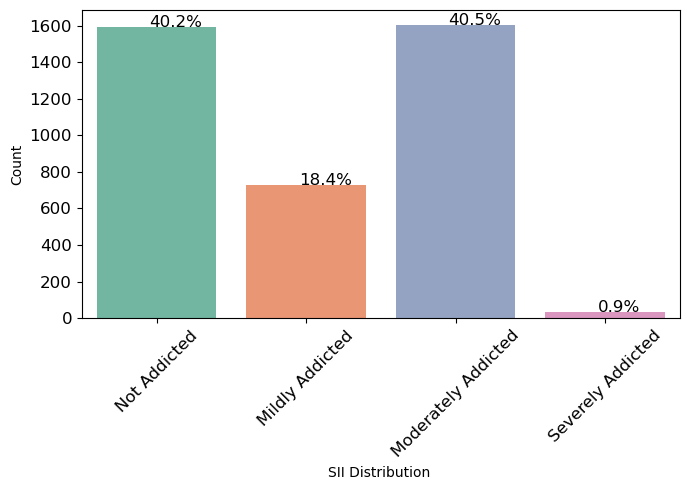

In [51]:
plt.figure(figsize =(7,5))
# count plot on two categorical variable
ax=sns.countplot(x ='sii', data = piu_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('SII Distribution ')
plt.yticks(size=12)
plt.ylabel('Count')

# Add labels for the categories
plt.xticks([0, 1, 2, 3], ['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

without_hue (ax,piu_df.sii)

Approximately 40% of participants were unaffected by problematic internet use.
Only a small portion, roughly 10%, exhibited moderate to severe impairment.

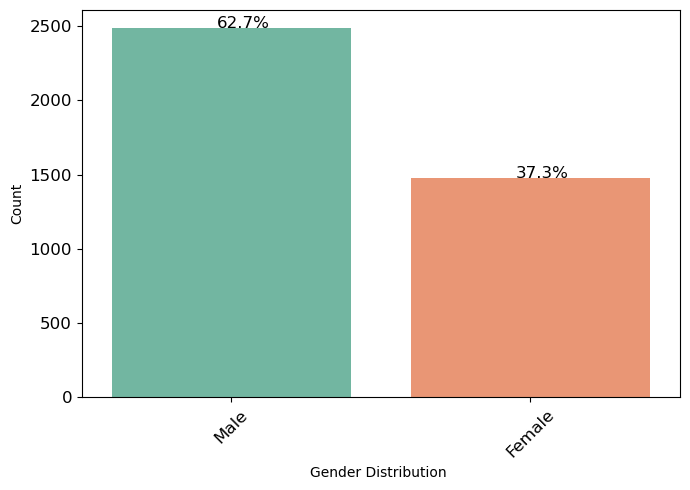

In [52]:
plt.figure(figsize =(7,5))
# count plot on two categorical variable
ax=sns.countplot(x ='Basic_Demos-Sex', data = piu_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Gender Distribution ')
plt.yticks(size=12)
plt.ylabel('Count')

# Add labels for the categories
plt.xticks([0, 1], ['Male', 'Female'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

without_hue (ax,piu_df.sii)

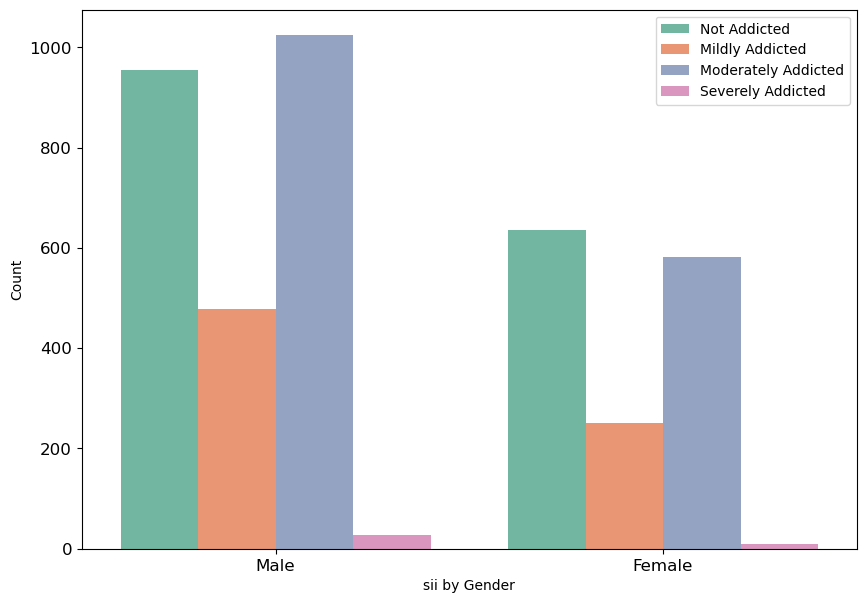

In [53]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='Basic_Demos-Sex', hue = 'sii',  data = piu_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('sii by Gender')
plt.yticks(size=12)
plt.ylabel('Count')
# Add labels for the categories
plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])

The dataset contains more Male than female participants though the SII distribution shows the same pattern. 

In [54]:
piu_df['age_range'] = pd.cut(x=piu_df['Basic_Demos-Age'],   bins=[4, 12, 18, 22], labels=['Children (5-12)', 'Adolescents (13-18)', 'Young Adults (19-22)'])


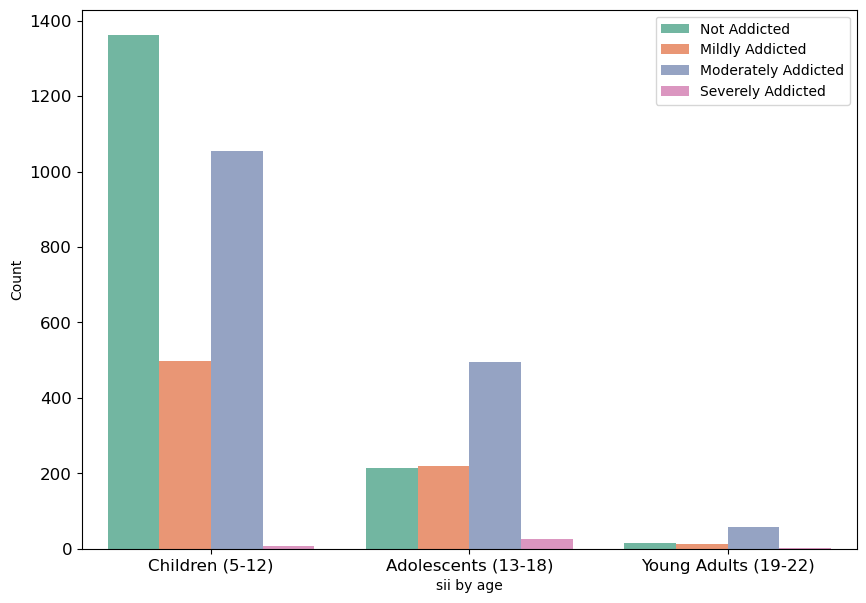

In [55]:
plt.figure(figsize =(10,7))
# count plot on two categorical variable
ax=sns.countplot(x ='age_range', hue = 'sii',  data = piu_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('sii by age')
plt.yticks(size=12)
plt.ylabel('Count')
# Add labels for the categories
#plt.xticks([0, 1], ['Male', 'Female'])
plt.legend(['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])

The dataset showing more children participants compare to adolecent while young adults are notably low. This limited pattern representation may impact the reliability of conclusions for adults.

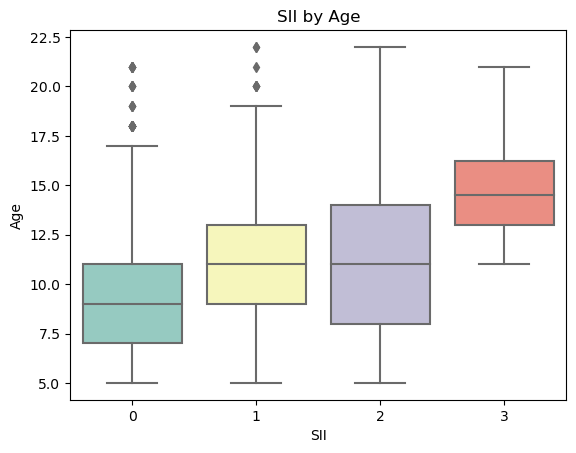

In [56]:
# Plot SII by Age
ax=sns.boxplot(y=piu_df['Basic_Demos-Age'], x=piu_df['sii'], palette="Set3")
ax.set_title('SII by Age')
ax.set_ylabel('Age')
ax.set_xlabel('SII')
plt.show()


Older Participants shows higher SII. This shows that the Problematic Internet Use is high for adolescence while the concern is less for younger children. 

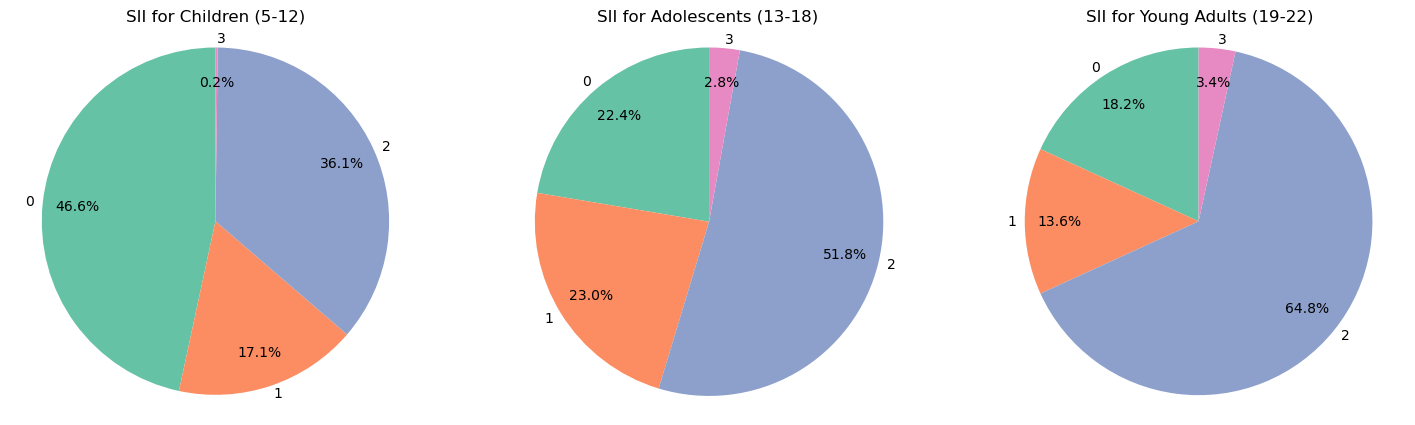

In [57]:
age_sii_stats = piu_df.groupby(['age_range', 'sii']).size().unstack(fill_value=0)
fig, axes = plt.subplots(1, len(age_sii_stats), figsize=(18, 5))

for idx, age_range in enumerate(age_sii_stats.index):
    age_group_distribution = age_sii_stats.loc[age_range] / age_sii_stats.loc[age_range].sum()
    axes[idx].pie(
        age_group_distribution, labels=age_group_distribution.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("Set2"),
        labeldistance=1.05, pctdistance=0.80
    )
    axes[idx].set_title(f'SII for {age_range}')
    axes[idx].axis('equal')

#plt.tight_layout()
plt.show()

## Internet Usage

In [58]:
usage_labels = {0: '< 1h/day', 1: '~ 1h/day', 2: '~ 2hs/day', 3: '> 3hs/day'}
piu_df['internet_use_category'] = piu_df[
    'PreInt_EduHx-computerinternet_hoursday'
].map(usage_labels)

usage_order = [ '< 1h/day', '~ 1h/day', '~ 2hs/day', '> 3hs/day']
piu_df['internet_use_category'] = pd.Categorical(
    piu_df['internet_use_category'], categories=usage_order, ordered=True
)

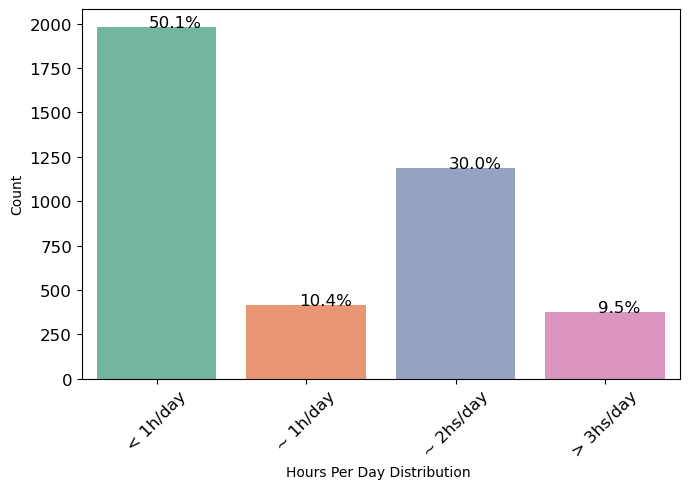

In [59]:
plt.figure(figsize =(7,5))
# count plot on two categorical variable
ax=sns.countplot(x ='internet_use_category', data = piu_df, palette = "Set2")
plt.xticks(size=12)
plt.xlabel('Hours Per Day Distribution ')
plt.yticks(size=12)
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

without_hue (ax,piu_df.sii)

#### Half of the participants reported internet usage is less than  an hour a day

## Internet Usage hours by Age

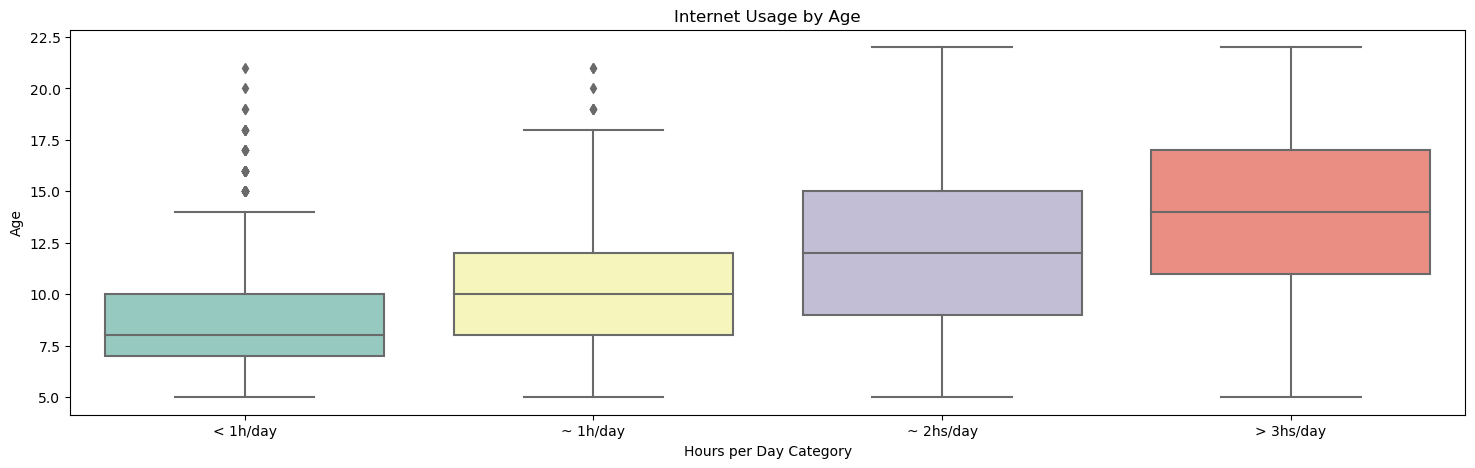

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(18, 5))

# Plot internet usage hours by age
sns.boxplot(y=piu_df['Basic_Demos-Age'], x=piu_df['PreInt_EduHx-computerinternet_hoursday'], palette="Set3")
axes.set_title('Internet Usage by Age')
axes.set_ylabel('Age')
axes.set_xlabel('Hours per Day Category')
plt.xticks([0, 1, 2, 3], ['< 1h/day', '~ 1h/day', '~ 2hs/day', '> 3hs/day'])
plt.show()

#### The Box plot shows thepattern in daily internet usage with the participants age. Older participants shows longer daily internet usage. 


### Internet Usage by Gender

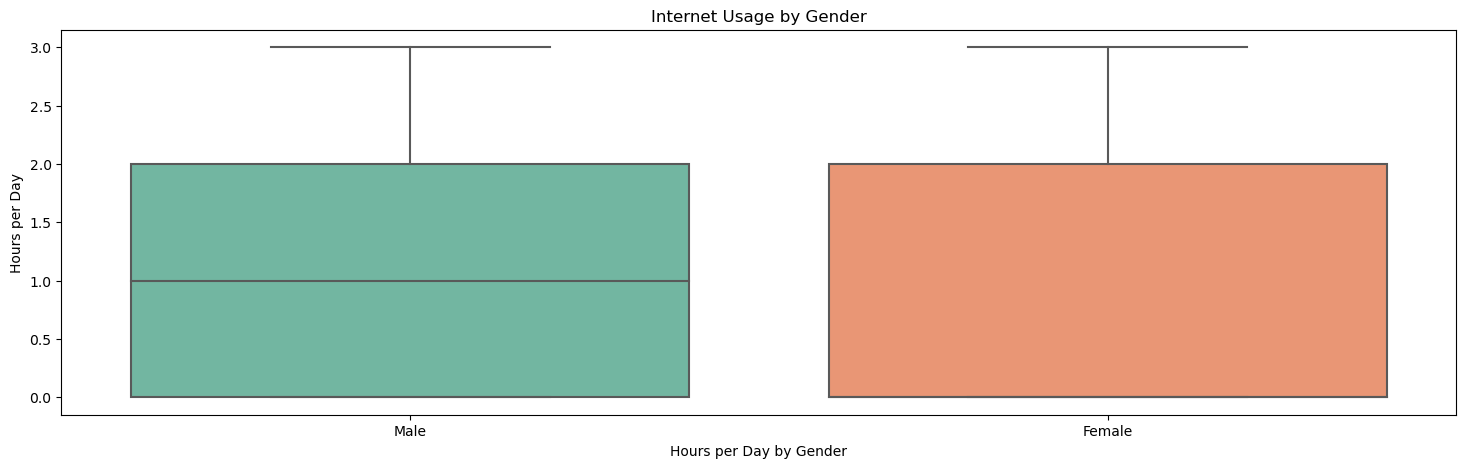

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(18, 5))

# Plot internet usage hours by age
sns.boxplot(y=piu_df['PreInt_EduHx-computerinternet_hoursday'], x=piu_df['Basic_Demos-Sex'], palette="Set2")
axes.set_title('Internet Usage by Gender')
axes.set_ylabel('Hours per Day')
axes.set_xlabel('Hours per Day by Gender')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

#### The internet usage by Gender shows no significant differences which means that gender does not have impact to daily inter usage pattern in this data. 

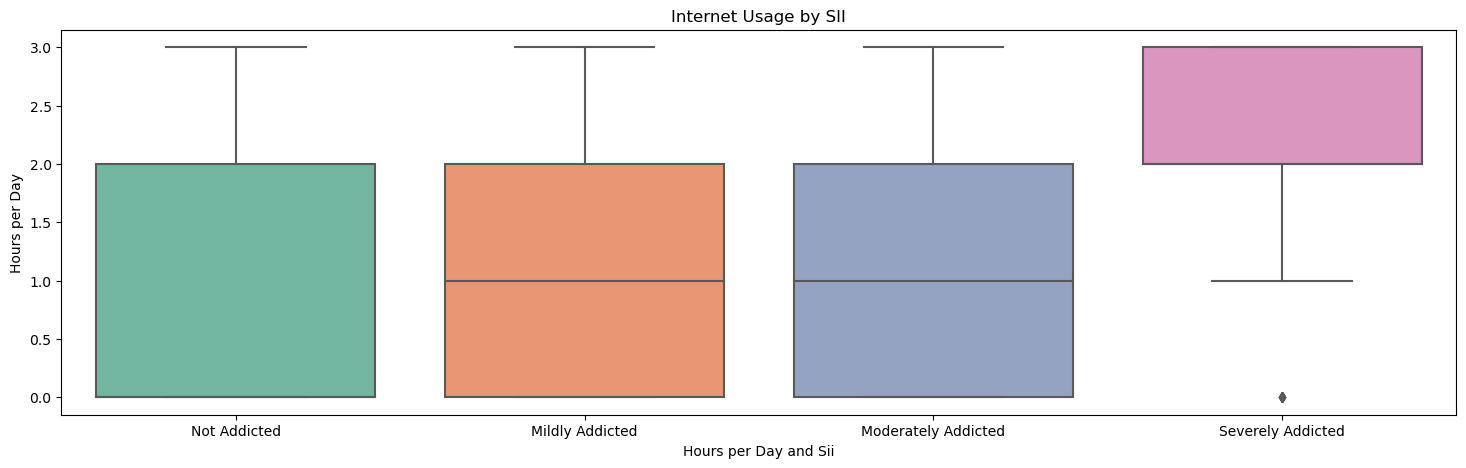

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(18, 5))

# Plot internet usage hours by age
sns.boxplot(y=piu_df['PreInt_EduHx-computerinternet_hoursday'], x=piu_df['sii'], palette="Set2")
axes.set_title('Internet Usage by SII')
axes.set_ylabel('Hours per Day')
axes.set_xlabel('Hours per Day and Sii')
plt.xticks([0, 1, 2, 3], ['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])
plt.show()

This diagram illustrates that higher SII scores correspond to more hours of daily internet use, which aligns with expectations since excessive internet usage contributes to problematic internet behaviors. However, at lower SII levels, the differences in usage are not significant, suggesting that other factors may also influence Problematic Internet Use. One thing to look also is that there are participants that categorized as severely addicted but their internet usage are less than 2 hours which could also mean that there are also other factors impacting their addiction to internet

## Children Global Assessment Scale

#### The Children's Global Assessment Scale (CGAS) is a numeric scale used by mental health clinicians to rate the general functioning of youths under the age of 18. Scores range from 1 to 90 or 1 to 100, with high scores indicating better functioning.


In [63]:
piu_df['CGAS-CGAS_Score'].describe().to_frame().transpose()

,count,mean,std,min,25%,50%,75%,max
CGAS-CGAS_Score,3960.0,65.27803,17.46905,25.0,61.0,65.0,68.0,999.0


#### Max of 999 is an outlier and must be removed

In [64]:
piu_df = piu_df.loc[piu_df['CGAS-CGAS_Score'] <= 100]
piu_df.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-Season,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,sii,internet_use_category
0,Fall,5,0,Winter,51.0,Fall,16.877316,1.1500,23.0632,67.0,82.0,112.0,Fall,0.0,0.0,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.668550,16.8792,932.498,1492.00,8.25598,41.5862,13.81770,3.061430,9.21377,1.0,24.43490,8.89536,38.91770,19.54130,32.69090,Fall,55.0,Spring,39.0,55.0,Fall,3.0,Children (5-12),2,> 3hs/day
1,Summer,9,0,Spring,65.0,Fall,14.035590,1.2000,20.8840,75.0,70.0,122.0,Fall,3.0,0.0,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.579490,14.0371,936.656,1498.65,6.01993,42.0291,12.82540,1.211720,3.97085,1.0,21.03520,14.97400,39.44970,15.41070,27.05520,Fall,0.0,Fall,46.0,64.0,Summer,0.0,Children (5-12),0,< 1h/day
2,Summer,10,1,Fall,71.0,Fall,16.648696,1.4125,34.3224,65.0,94.0,117.0,Fall,20.0,1.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,Summer,2.0,3.254405,16.6778,1040.185,1622.25,15.01275,53.0562,13.82405,3.014405,11.67300,2.0,24.11965,14.04705,49.26075,23.63575,39.18475,Fall,28.0,Fall,38.0,54.0,Summer,2.0,Children (5-12),0,~ 2hs/day
3,Winter,9,0,Fall,71.0,Summer,18.292347,1.4000,37.0464,60.0,97.0,117.0,Summer,18.0,1.0,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.841910,18.2943,1131.430,1923.44,15.59250,62.7757,14.07400,4.220330,18.82430,2.0,30.40410,16.77900,58.93380,26.47980,45.99660,Summer,44.0,Summer,31.0,45.0,Winter,0.0,Children (5-12),1,< 1h/day
4,Spring,18,1,Summer,65.0,Spring,22.482416,1.5875,56.6592,70.0,77.0,119.0,Spring,15.0,0.0,3.0,0.0,10.5,1.0,11.0,1.0,11.0,1.0,Summer,3.0,4.754400,22.2490,1339.390,2084.89,28.78480,84.9253,14.98780,7.104490,39.94920,2.0,34.02520,22.76010,80.72410,40.23190,62.79720,NaN,NaN,Spring,41.0,58.0,Spring,2.0,Adolescents (13-18),2,~ 2hs/day


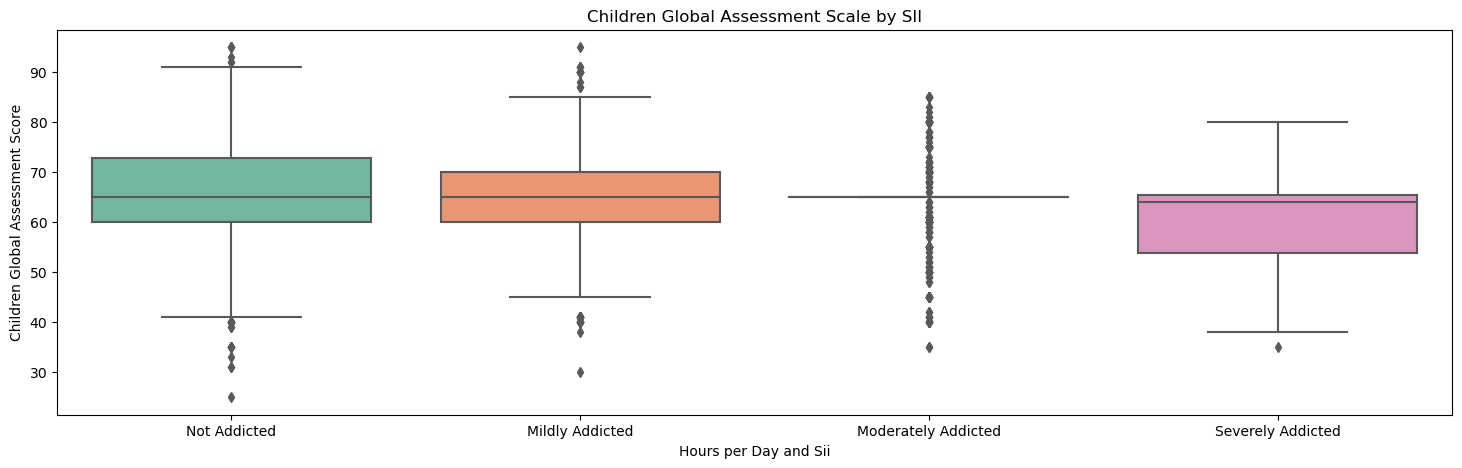

In [65]:
fig, axes = plt.subplots(1, 1, figsize=(18, 5))

# Plot CGAS by SII
sns.boxplot(y=piu_df['CGAS-CGAS_Score'], x=piu_df['sii'], palette="Set2")
axes.set_title('Children Global Assessment Scale by SII')
axes.set_ylabel('Children Global Assessment Score')
axes.set_xlabel('Hours per Day and Sii')
plt.xticks([0, 1, 2, 3], ['Not Addicted', 'Mildly Addicted', 'Moderately Addicted', 'Severely Addicted'])
plt.show()

As expected, participants with higher SII scores tend to have lower CGAS scores, reflecting a slight decrease in general functioning with more severe PIU. However, this decrease is modest, showing only a subtle association between higher PIU severity and CGAS scores.

In [66]:
CGAS_BY_SII = piu_df.groupby('sii')['CGAS-CGAS_Score'].agg(['min', 'max'])
CGAS_BY_SII = CGAS_BY_SII.rename(columns={'min': 'Minimum CGAS Score', 'max': 'Maximum CGAS Score'})
CGAS_BY_SII

,Minimum CGAS Score,Maximum CGAS Score
sii,,
0,25.0,95.0
1,30.0,95.0
2,35.0,85.0
3,35.0,80.0


You may notice that the highest SII levels correspond to the lowest maximum CGAS scores, with none exceeding 80, indicating that problematic internet use affects the general functioning of youths under 18.

However, there is similar minimum and maximum CGAS scores across SII levels suggest no clear or consistent relationship between CGAS and SII.

### Physical Measure 

In [67]:
physical_cols = [i for i in piu_df_cleaned.columns if 'Physical' in i  and i !='Physical-Season']

physical_cols

['Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']

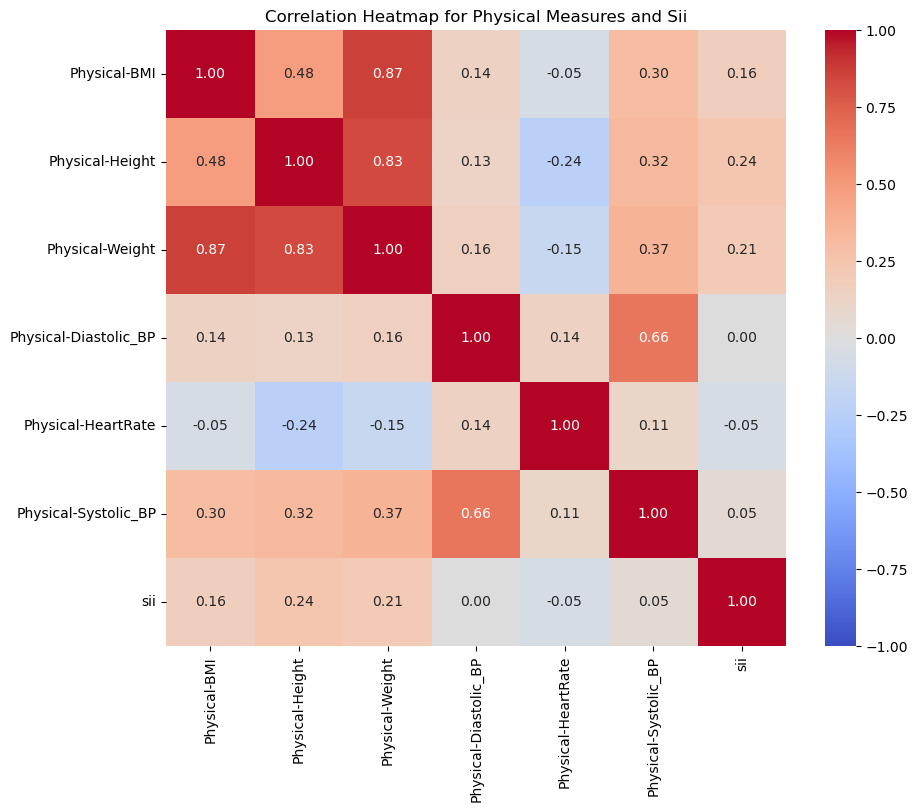

In [68]:
data_subset = piu_df[physical_cols + ['sii']]
correlation_matrix = data_subset.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Physical Measures and Sii')
plt.show()

BMI and SII is showing positive correlation with SII. This suggests that individuals with higher Height and Weight can tend to have an higher SII Level

## Prepare Data for Machine Learning Algorithm

### Handle Outliers
Looking at individual features and identify extreme values using interquartile range (IQR). Difference betweek first and third quartile set of data

In [69]:
piu_df_final=piu_df.copy()

In [70]:
# Step 1: Calculate Q1, Q3, and IQR for each numeric column
for coll in piu_df_final.columns:
    if piu_df_final[coll].dtypes in ["int64", "float64"]:
        # Calculate Q1, Q3, and IQR
        Q1 = piu_df_final[coll].quantile(0.25)
        Q3 = piu_df_final[coll].quantile(0.75)
        IQR = Q3 - Q1
        
        # Step 2: Determine the bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Step 3: Identify the outliers
        outliers = piu_df_final[(piu_df_final[coll] < lower_bound) | (piu_df_final[coll] > upper_bound)]
        
        # Print the column name and outliers only if there are outliers
        if not outliers.empty:
            print(f"Outliers in {coll} is:", len(outliers[coll]))
            
        # Step 4: Filter the DataFrame to remove outliers
        piu_df_final = piu_df_final[(piu_df_final[coll] >= lower_bound) & (piu_df_final[coll] <= upper_bound)]        

Outliers in Basic_Demos-Age is: 37
Outliers in CGAS-CGAS_Score is: 356
Outliers in Physical-BMI is: 180
Outliers in Physical-Height is: 3
Outliers in Physical-Weight is: 26
Outliers in Physical-Diastolic_BP is: 310
Outliers in Physical-HeartRate is: 238
Outliers in Physical-Systolic_BP is: 178
Outliers in FGC-FGC_CU is: 105
Outliers in FGC-FGC_PU is: 439
Outliers in FGC-FGC_PU_Zone is: 172
Outliers in FGC-FGC_SRL is: 152
Outliers in FGC-FGC_SRL_Zone is: 265
Outliers in FGC-FGC_SRR is: 64
Outliers in FGC-FGC_SRR_Zone is: 44
Outliers in FGC-FGC_TL is: 221
Outliers in FGC-FGC_TL_Zone is: 8
Outliers in BIA-BIA_Activity_Level_num is: 14
Outliers in BIA-BIA_BMC is: 227
Outliers in BIA-BIA_BMI is: 90
Outliers in BIA-BIA_BMR is: 16
Outliers in BIA-BIA_DEE is: 1
Outliers in BIA-BIA_FFMI is: 7
Outliers in PCIAT-PCIAT_Total is: 1
Outliers in SDS-SDS_Total_Raw is: 15
Outliers in SDS-SDS_Total_T is: 6
Outliers in PreInt_EduHx-computerinternet_hoursday is: 14


#### Drop High Correlation Variables

In [71]:
# Create correlation matrix
corr_matrix = piu_df_final.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
to_drop
piu_df_final.drop(to_drop, axis=1, inplace=True)
piu_df_final.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Frame_num,PCIAT-Season,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,sii,internet_use_category
11,Fall,11,0,Summer,66.0,Spring,17.710324,1.3125,30.5088,67.0,82.0,112.0,Winter,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,Summer,2.0,Winter,10.0,Winter,42.0,Fall,0.0,Children (5-12),0,< 1h/day
25,Spring,9,0,Winter,60.0,Fall,17.089151,1.3300,31.2352,62.0,88.0,123.0,Fall,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,Summer,2.0,Fall,9.0,Summer,27.0,Spring,0.0,Children (5-12),0,< 1h/day
49,Summer,6,0,Winter,51.0,Fall,15.824079,1.1375,21.1564,64.0,84.0,98.0,Spring,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,Summer,2.0,Fall,18.0,Fall,38.0,Summer,0.0,Children (5-12),0,< 1h/day
66,Winter,12,1,Spring,72.0,Spring,17.130522,1.3125,29.5100,67.0,83.0,112.0,Spring,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,Summer,2.0,Winter,62.0,Winter,47.0,Winter,2.0,Children (5-12),2,~ 2hs/day
81,Fall,9,1,Winter,80.0,Fall,14.515486,1.3250,26.3320,58.0,73.0,112.0,Winter,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,Summer,2.0,Fall,12.0,Fall,45.0,Fall,0.0,Children (5-12),0,< 1h/day


### Label Encoding

In [72]:
piu_df_cat = piu_df_final.select_dtypes(exclude=np.number)
piu_df_cat.head ()
piu_df_cat.columns.tolist()

['Basic_Demos-Enroll_Season',
 'CGAS-Season',
 'Physical-Season',
 'FGC-Season',
 'BIA-Season',
 'PCIAT-Season',
 'SDS-Season',
 'PreInt_EduHx-Season',
 'age_range',
 'internet_use_category']

In [74]:
le = LabelEncoder()

In [75]:
for col in piu_df_cat:
    piu_df_final[col] = le.fit_transform(piu_df_final[col])        

#### standard scalar to the data.
This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:


In [76]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_feature = scaler.fit_transform(piu_df_final.values)

In [77]:
piu_df_final_scaled = pd.DataFrame(scaled_feature, index=piu_df_final.index, columns=piu_df_final.columns)
piu_df_final_scaled.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Frame_num,PCIAT-Season,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,sii,internet_use_category
11,-1.278746,1.371371,-0.731768,0.792280,-0.204703,-0.299695,0.184641,-0.010104,-0.035485,0.069150,-0.018776,0.039675,1.434835,-0.320818,-0.779813,0.216612,0.0,-0.774845,0.0,0.0,-0.612901,0.0,0.0,0.0,1.516249,-0.819058,1.487213,0.494576,-1.265001,-0.604432,0.0,-0.652781,-0.604432
25,-0.375655,0.315105,-0.731768,1.800637,-0.967929,-1.304308,-0.072304,0.157394,0.059923,-0.692785,0.793734,1.688386,-1.509051,-0.320818,-0.779813,0.216612,0.0,-0.774845,0.0,0.0,-0.612901,0.0,0.0,0.0,-1.281171,-0.873892,0.563044,-1.604873,-0.349894,-0.604432,0.0,-0.652781,-0.604432
49,0.527435,-1.269295,-0.731768,1.800637,-2.112768,-1.304308,-0.595596,-1.685089,-1.263852,-0.388011,0.252060,-2.058685,-0.527755,-0.320818,-0.779813,0.216612,0.0,-0.774845,0.0,0.0,-0.612901,0.0,0.0,0.0,-1.281171,-0.380384,-1.285294,-0.065277,0.565213,-0.604432,0.0,-0.652781,-0.604432
66,1.430526,1.899504,1.366554,-0.216076,0.558523,-0.299695,-0.055192,-0.010104,-0.166669,0.069150,0.116642,0.039675,-0.527755,0.645696,1.282359,0.216612,0.0,1.192228,0.0,0.0,1.144574,0.0,0.0,0.0,1.516249,2.032323,1.487213,1.194392,1.480320,2.011110,0.0,2.278574,2.011110
81,-1.278746,0.315105,1.366554,1.800637,1.576158,-1.304308,-1.136890,0.109538,-0.584076,-1.302333,-1.237542,0.039675,1.434835,0.645696,1.282359,0.216612,0.0,1.192228,0.0,0.0,1.144574,0.0,0.0,0.0,-1.281171,-0.709389,-1.285294,0.914466,-1.265001,-0.604432,0.0,-0.652781,-0.604432


### Machine Learning Algorithm

In [79]:
piu_df_final.head()

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Frame_num,PCIAT-Season,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,sii,internet_use_category
11,0,11,0,2,66.0,1,17.710324,1.3125,30.5088,67.0,82.0,112.0,3,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,3,10.0,3,42.0,0,0.0,0,0,0
25,1,9,0,3,60.0,0,17.089151,1.3300,31.2352,62.0,88.0,123.0,0,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,0,9.0,2,27.0,1,0.0,0,0,0
49,2,6,0,3,51.0,0,15.824079,1.1375,21.1564,64.0,84.0,98.0,1,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,0,18.0,0,38.0,2,0.0,0,0,0
66,3,12,1,1,72.0,1,17.130522,1.3125,29.5100,67.0,83.0,112.0,1,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,0,2.0,3,62.0,3,47.0,3,2.0,0,2,2
81,0,9,1,3,80.0,0,14.515486,1.3250,26.3320,58.0,73.0,112.0,3,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,0,2.0,0,12.0,0,45.0,0,0.0,0,0,0


In [80]:
X=piu_df_final.drop('sii',axis=1)
y=piu_df_final['sii']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [612]:
X_test.head(100)

,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Frame_num,PCIAT-Season,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,age_range,internet_use_category
1867,3,10,0,1,65.0,1,17.710324,1.31250,30.5088,67.0,82.0,112.0,1,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,3,38.0,3,41.0,3,1.0,0,1
242,0,7,0,1,65.0,1,15.303401,1.31250,27.2400,72.0,86.0,112.0,1,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,3,23.0,3,37.0,0,0.0,0,0
3550,2,9,1,2,70.0,1,17.130522,1.31250,29.5100,67.0,83.0,112.0,2,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,0,2.0,2,30.0,2,42.0,2,0.0,0,0
2072,0,6,1,3,75.0,0,13.894456,1.07875,16.7072,67.0,86.0,115.0,3,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,0,2.0,0,0.0,0,31.0,0,0.0,0,0
105,1,8,0,0,61.0,1,17.710324,1.31250,30.5088,67.0,82.0,112.0,1,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,2,26.0,2,38.0,1,0.0,0,0
2843,2,8,1,3,65.0,0,16.283659,1.37825,31.9616,80.0,73.0,121.0,3,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,0,2.0,0,0.0,0,35.0,2,0.0,0,0
145,3,6,1,0,70.0,1,17.130522,1.31250,29.5100,67.0,83.0,112.0,1,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,0,2.0,2,17.0,2,37.0,3,0.0,0,0
3728,0,10,0,2,65.0,1,17.710324,1.31250,30.5088,67.0,82.0,112.0,2,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,1,20.0,1,28.0,0,0.0,0,0
1804,1,7,0,2,80.0,1,19.996444,1.12500,26.1504,75.0,94.0,122.0,0,6.0,0.0,2.0,0.0,8.0,1.0,1.0,9.0,1.0,0,2.0,1,0.0,1,35.0,1,0.0,0,0
3710,1,12,1,0,75.0,1,17.130522,1.31250,29.5100,67.0,83.0,112.0,1,7.0,1.0,2.0,0.0,10.0,1.0,1.0,10.0,1.0,0,2.0,1,28.0,1,44.0,1,2.0,0,2


In [81]:
y_test.head()

1867    1
242     0
3550    0
2072    0
105     0
Name: sii, dtype: int64

In [87]:
result1, result2, result3 = [], [], [] 


In [96]:
train_f1_scores = []
test_f1_scores = []
model_names = []


def call_model(model, model_name):
    # fit using scaled data
    global train_f1_scores, test_f1_scores, model_names
    model.fit(X_train, y_train) 
    
    # Prediction
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)  
    
    # Calculate metrics with specified average
    train_accuracy = accuracy_score(y_train, train_pred) * 100
    train_recall = recall_score(y_train, train_pred, average='weighted') * 100
    train_f1_score = f1_score(y_train, train_pred, average='weighted') * 100
    
    test_accuracy = accuracy_score(y_test, test_pred) * 100
    test_recall = recall_score(y_test, test_pred, average='weighted') * 100
    test_f1_score = f1_score(y_test, test_pred, average='weighted') * 100


    train_f1_scores.append(train_f1_score)
    test_f1_scores.append(test_f1_score)
    model_names.append(model_name)

    
    # Append results
    result1.append(test_accuracy)
    result2.append(test_recall)
    result3.append(test_f1_score)
    
    print("Classification Report for Test Data:")
    print(classification_report(y_test, test_pred))
    
    print("\nClassification Report for Train Data:")
    print(classification_report(y_train, train_pred))  
    
    # Accuracy, Recall, and F1 Scores
    print(f'Training Accuracy: {train_accuracy}, Train Recall: {train_recall}, Train F1: {train_f1_score}')
    print(f'Test Accuracy: {test_accuracy}, Test Recall: {test_recall}, Test F1: {test_f1_score}')
    
    # Confusion matrix
    cm = confusion_matrix(y_test, test_pred)
    sns.heatmap(cm, annot=True, fmt='0.2f', cmap='YlGnBu', linewidths=1)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    
    labels = ['Train F1 Score', 'Test F1 Score']
    scores = [train_f1_score, test_f1_score]

    plt.figure(figsize=(4, 7))  # Larger figure for better design
    bars = plt.bar(labels, scores, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

    plt.ylim(0, 100)  # Since F1 scores are percentages, 0 to 100 is the range
    plt.title(f'F1 Score Comparison: {model_name}', fontsize=14)
    plt.ylabel('F1 Score (%)')
    
    # Display values in the center of the bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height/2, f'{height:.2f}%', 
                 ha='center', va='center', color='white', fontsize=12)

    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    plt.tight_layout()
    plt.show()

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        54
           1       1.00      0.80      0.89        15
           2       0.91      1.00      0.95        10

    accuracy                           0.96        79
   macro avg       0.96      0.93      0.94        79
weighted avg       0.96      0.96      0.96        79


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        16

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

Training Accuracy: 100.0, Train Recall: 100.0, Train F1: 100.0
Test Accuracy: 96.20253164556962, Test Recall: 96.20253164556962, Test F1: 96.04471477889199


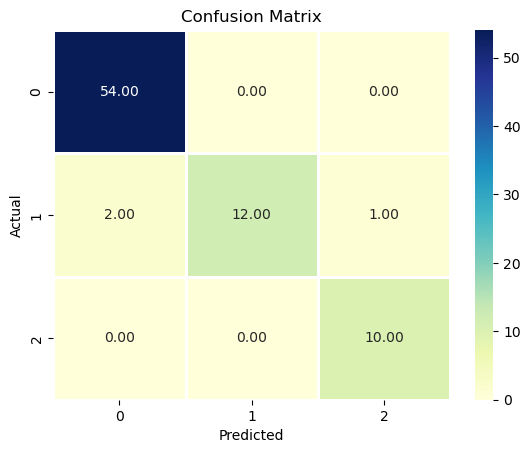

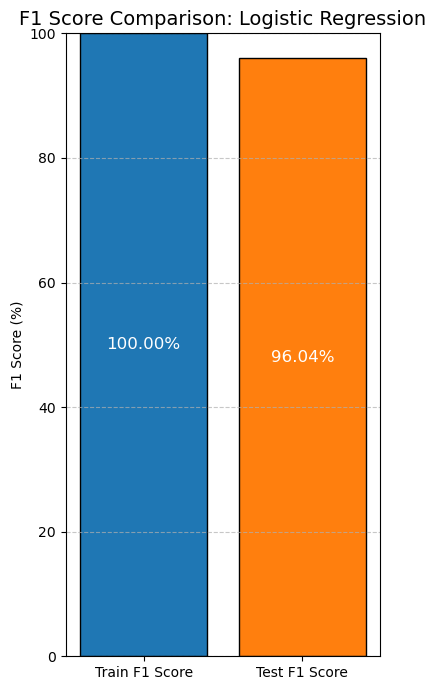

In [97]:
from sklearn.linear_model import LogisticRegression  

logistic_regression = LogisticRegression()
call_model(logistic_regression, 'Logistic Regression')


Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        54
           1       0.17      0.13      0.15        15
           2       0.00      0.00      0.00        10

    accuracy                           0.71        79
   macro avg       0.32      0.38      0.35        79
weighted avg       0.58      0.71      0.64        79


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       104
           1       0.45      0.33      0.38        39
           2       0.00      0.00      0.00        16

    accuracy                           0.74       159
   macro avg       0.42      0.44      0.42       159
weighted avg       0.63      0.74      0.68       159

Training Accuracy: 73.58490566037736, Train Recall: 73.58490566037736, Train F1: 67.51962839643195
Test Accuracy: 70.88607594936708, Test Recall: 70.8860759493670

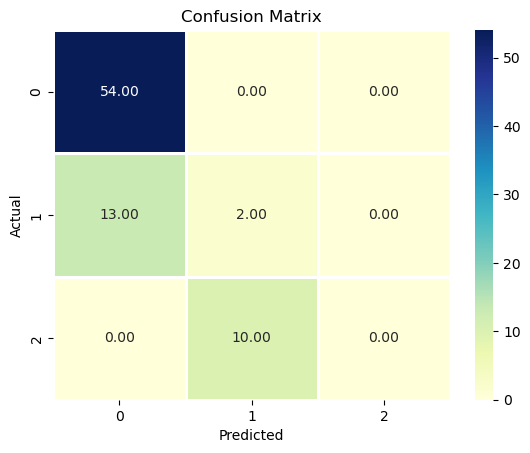

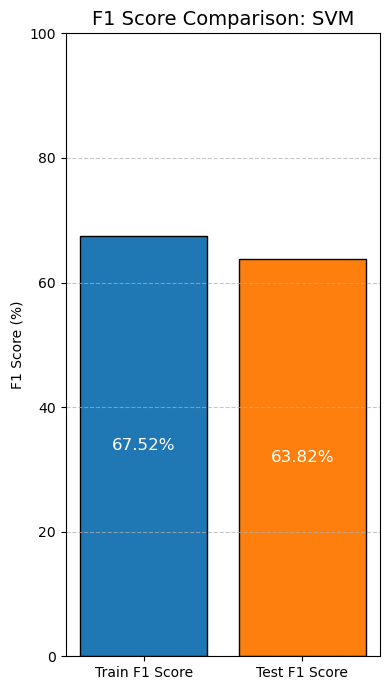

In [98]:
from sklearn.svm import SVC

SVM = SVC()
call_model(SVM, 'SVM')

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        10

    accuracy                           0.99        79
   macro avg       0.99      0.98      0.99        79
weighted avg       0.99      0.99      0.99        79


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        16

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159

Training Accuracy: 100.0, Train Recall: 100.0, Train F1: 100.0
Test Accuracy: 98.73417721518987, Test Recall: 98.73417721518987, Test F1: 98.71815921095312


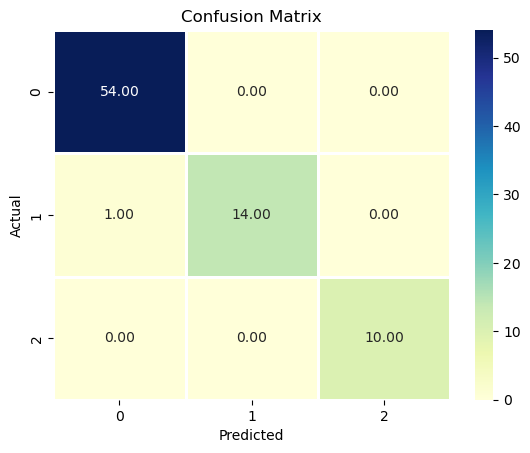

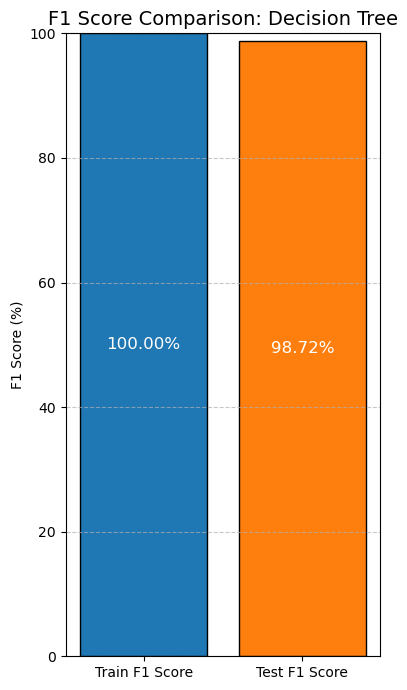

In [99]:
decision_tree_classifier = DecisionTreeClassifier()
call_model(decision_tree_classifier, 'Decision Tree')

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.75      0.80      0.77        15
           2       1.00      0.60      0.75        10

    accuracy                           0.91        79
   macro avg       0.90      0.80      0.83        79
weighted avg       0.92      0.91      0.91        79


Classification Report for Train Data:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       104
           1       0.90      0.90      0.90        39
           2       1.00      0.75      0.86        16

    accuracy                           0.95       159
   macro avg       0.95      0.88      0.91       159
weighted avg       0.95      0.95      0.95       159

Training Accuracy: 94.9685534591195, Train Recall: 94.9685534591195, Train F1: 94.81259217820272
Test Accuracy: 91.13924050632912, Test Recall: 91.13924050632912,

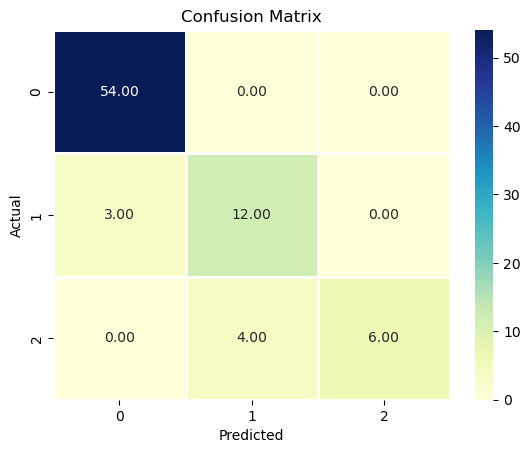

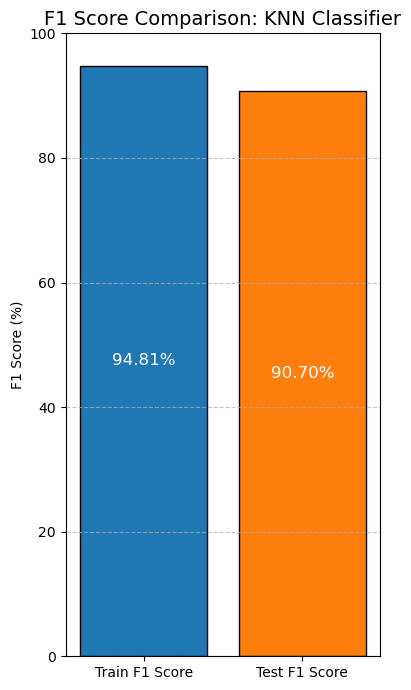

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
call_model(knn, 'KNN Classifier')